<h2><strong>Project Title: Predicting Bank Customer Churn — A Comparative Study of Classification Models</strong></h2>

<h3><strong>Setup and Data Exploration (EDA)</strong></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 17

data = pd.read_csv("Churn_Modelling.csv")

In [2]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data["Exited"].value_counts(
    normalize=True
)  # Imbalanced dataset, i.e. accuracy_score wouldn't be suitable.

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [6]:
data = data.drop(columns=["RowNumber", "CustomerId", "Surname"])
data["Gender"] = np.where(data["Gender"] == "Male", 1, 0)

data = pd.get_dummies(data, columns=["Geography"], dtype=int)

<h3><strong>Data Preprocessing for Modeling</strong></h3>

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = data["Exited"]
X = data.drop(columns=["Exited"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=SEED
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h3><strong>Baseline Model Comparison</strong></h3>

{'KerSVM': 0.8630109308075409, 'RanFor': 0.8532006582854039, 'KNN': 0.7685667177192601, 'LogReg': 0.760518607976235, 'LinSVM': 0.7603674552827094, 'DecTree': 0.6718421040454938}


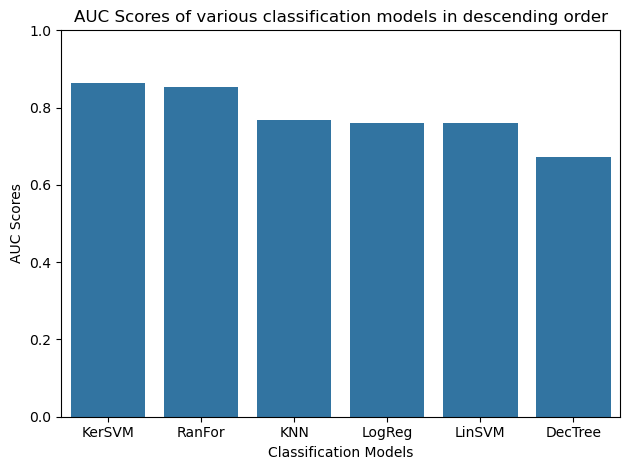

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

lr = LogisticRegression(random_state=SEED, class_weight="balanced")
lr.fit(X=X_train_scaled, y=y_train)

lsvm = LinearSVC(random_state=SEED, class_weight="balanced")
lsvm.fit(X=X_train_scaled, y=y_train)

ksvm = SVC(random_state=SEED, probability=True, class_weight="balanced")
ksvm.fit(X=X_train_scaled, y=y_train)

dtc = DecisionTreeClassifier(random_state=SEED, class_weight="balanced")
dtc.fit(X=X_train_scaled, y=y_train)

rfc = RandomForestClassifier(random_state=SEED, class_weight="balanced")
rfc.fit(X=X_train_scaled, y=y_train)

knc = KNeighborsClassifier()
knc.fit(X=X_train_scaled, y=y_train)

lr_auc = roc_auc_score(y_true=y_test, y_score=lr.predict_proba(X_test_scaled)[:, 1])
lsvm_auc = roc_auc_score(y_true=y_test, y_score=lsvm.decision_function(X_test_scaled))
ksvm_auc = roc_auc_score(y_true=y_test, y_score=ksvm.predict_proba(X_test_scaled)[:, 1])
dtc_auc = roc_auc_score(y_true=y_test, y_score=dtc.predict_proba(X_test_scaled)[:, 1])
rfc_auc = roc_auc_score(y_true=y_test, y_score=rfc.predict_proba(X_test_scaled)[:, 1])
knc_auc = roc_auc_score(y_true=y_test, y_score=knc.predict_proba(X_test_scaled)[:, 1])

auc_scores = {
    "LogReg": lr_auc,
    "LinSVM": lsvm_auc,
    "KerSVM": ksvm_auc,
    "DecTree": dtc_auc,
    "RanFor": rfc_auc,
    "KNN": knc_auc,
}

auc_scores_sorted = dict(
    sorted(auc_scores.items(), key=lambda item: item[1], reverse=True)
)
print(auc_scores_sorted)
sns.barplot(data=auc_scores_sorted)
plt.ylim(0.0, 1.0)
plt.xlabel("Classification Models")
plt.ylabel("AUC Scores")
plt.title("AUC Scores of various classification models in descending order")
plt.tight_layout()

<h3><strong>Hyperparameter Experimentation and Analysis</strong></h3>

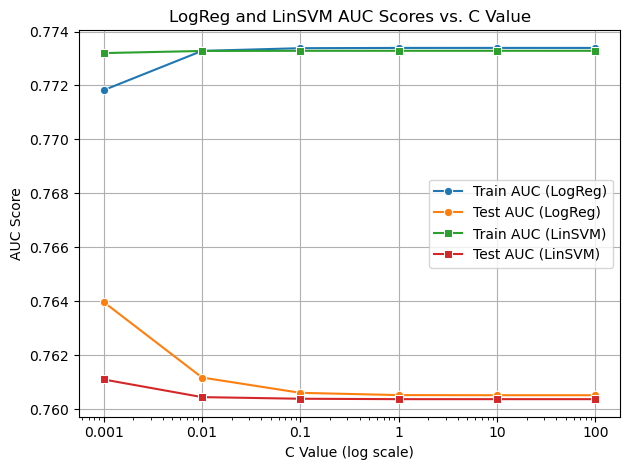

In [9]:
c_values = [0.001, 0.01, 0.1, 1, 10, 100]
lr_c_list = []
lsvm_c_list = []

for c in c_values:
    lr = LogisticRegression(C=c, random_state=SEED, class_weight="balanced")
    lsvm = LinearSVC(C=c, random_state=SEED, class_weight="balanced")
    lr.fit(X=X_train_scaled, y=y_train)
    lsvm.fit(X=X_train_scaled, y=y_train)

    train_auc_lr = roc_auc_score(
        y_true=y_train, y_score=lr.predict_proba(X_train_scaled)[:, 1]
    )
    test_auc_lr = roc_auc_score(
        y_true=y_test, y_score=lr.predict_proba(X_test_scaled)[:, 1]
    )
    lr_c_list.append([train_auc_lr, test_auc_lr, c])

    train_auc_lsvm = roc_auc_score(
        y_true=y_train, y_score=lsvm.decision_function(X_train_scaled)
    )
    test_auc_lsvm = roc_auc_score(
        y_true=y_test, y_score=lsvm.decision_function(X_test_scaled)
    )
    lsvm_c_list.append([train_auc_lsvm, test_auc_lsvm, c])

df_lr_c = pd.DataFrame(lr_c_list, columns=["train_auc", "test_auc", "c_value"])
df_lsvm_c = pd.DataFrame(lsvm_c_list, columns=["train_auc", "test_auc", "c_value"])

sns.lineplot(
    data=df_lr_c,
    x="c_value",
    y="train_auc",
    label="Train AUC (LogReg)",
    marker="o",
)
sns.lineplot(
    data=df_lr_c,
    x="c_value",
    y="test_auc",
    label="Test AUC (LogReg)",
    marker="o",
)
sns.lineplot(
    data=df_lsvm_c,
    x="c_value",
    y="train_auc",
    label="Train AUC (LinSVM)",
    marker="s",
)
sns.lineplot(
    data=df_lsvm_c,
    x="c_value",
    y="test_auc",
    label="Test AUC (LinSVM)",
    marker="s",
)

plt.xlabel("C Value (log scale)")
plt.ylabel("AUC Score")
plt.title("LogReg and LinSVM AUC Scores vs. C Value")
plt.xscale("log")
plt.xticks(c_values, labels=[str(c) for c in c_values])
plt.grid()
plt.tight_layout()

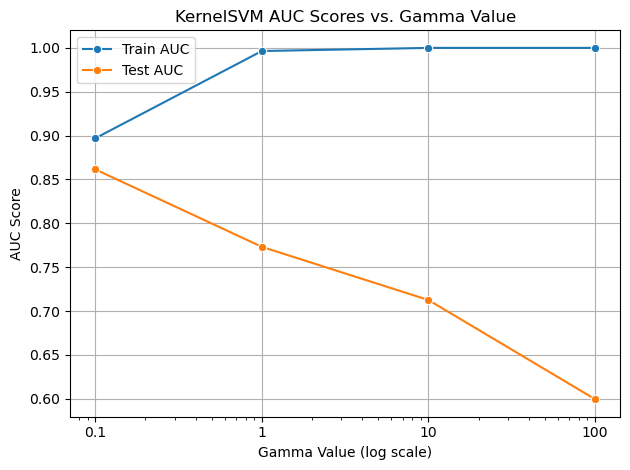

In [10]:
kvsm_gam_values = [0.1, 1, 10, 100]
ksvm_gam_list = []

for g in kvsm_gam_values:
    ksvm = SVC(
        C=1.0,
        kernel="rbf",
        gamma=g,
        random_state=SEED,
        probability=True,
        class_weight="balanced",
    )
    ksvm.fit(X=X_train_scaled, y=y_train)
    train_auc = roc_auc_score(
        y_true=y_train, y_score=ksvm.predict_proba(X_train_scaled)[:, 1]
    )
    test_auc = roc_auc_score(
        y_true=y_test, y_score=ksvm.predict_proba(X_test_scaled)[:, 1]
    )
    ksvm_gam_list.append([train_auc, test_auc, g])

df_ksvm = pd.DataFrame(data=ksvm_gam_list, columns=["train_auc", "test_auc", "gamma"])

sns.lineplot(data=df_ksvm, x="gamma", y="train_auc", label="Train AUC", marker="o")
sns.lineplot(data=df_ksvm, x="gamma", y="test_auc", label="Test AUC", marker="o")
plt.xscale("log")
plt.xticks(kvsm_gam_values, labels=[str(g) for g in kvsm_gam_values])
plt.xlabel("Gamma Value (log scale)")
plt.ylabel("AUC Score")
plt.title("KernelSVM AUC Scores vs. Gamma Value")
plt.grid()
plt.tight_layout()

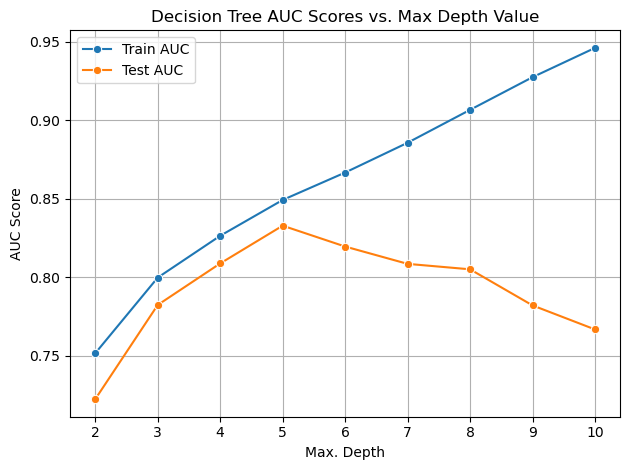

In [11]:
dt_depth_values = np.arange(2, 11)
dt_depth_list = []

for depth in dt_depth_values:
    dt = DecisionTreeClassifier(
        max_depth=depth, random_state=SEED, class_weight="balanced"
    )
    dt.fit(X=X_train_scaled, y=y_train)
    train_auc = roc_auc_score(
        y_true=y_train, y_score=dt.predict_proba(X=X_train_scaled)[:, 1]
    )
    test_auc = roc_auc_score(
        y_true=y_test, y_score=dt.predict_proba(X=X_test_scaled)[:, 1]
    )
    dt_depth_list.append([train_auc, test_auc, depth])

df_dt_depth = pd.DataFrame(
    data=dt_depth_list, columns=["train_auc", "test_auc", "depth"]
)

sns.lineplot(data=df_dt_depth, x="depth", y="train_auc", label="Train AUC", marker="o")
sns.lineplot(data=df_dt_depth, x="depth", y="test_auc", label="Test AUC", marker="o")
plt.xticks(dt_depth_values, labels=[str(dep) for dep in dt_depth_values])
plt.xlabel("Max. Depth")
plt.ylabel("AUC Score")
plt.title("Decision Tree AUC Scores vs. Max Depth Value")
plt.grid()
plt.tight_layout()

In [12]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=SEED, class_weight="balanced")
rfc_params = {
    "n_estimators": [100, 200, 400],
    "max_depth": range(6, 9),
    "min_samples_split": range(4, 7),
}
rfc_grid = GridSearchCV(
    estimator=rfc, param_grid=rfc_params, verbose=1, cv=5, scoring="roc_auc"
)
rfc_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


,estimator,RandomForestC...ndom_state=17)
,param_grid,"{'max_depth': range(6, 9), 'min_samples_split': range(4, 7), 'n_estimators': [100, 200, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [13]:
ksvm = SVC(random_state=SEED, class_weight="balanced", probability=True)
ksvm_params = {
    "C": [0.01, 0.1, 1, 10],
    "gamma": ["auto", "scale"],
}
ksvm_grid = GridSearchCV(
    estimator=ksvm, param_grid=ksvm_params, verbose=1, cv=5, scoring="roc_auc"
)
ksvm_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


,estimator,SVC(class_wei...ndom_state=17)
,param_grid,"{'C': [0.01, 0.1, ...], 'gamma': ['auto', 'scale']}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [14]:
print(f"Random Forest best score: {roc_auc_score(y_true=y_test, y_score=rfc_grid.best_estimator_.predict_proba(X_test_scaled)[:, 1])}")
print(f"Kernel SVM best score: {roc_auc_score(y_true=y_test, y_score=ksvm_grid.best_estimator_.predict_proba(X_test_scaled)[:, 1])}")

Random Forest best score: 0.8618896246014891
Kernel SVM best score: 0.8630109308075409


In [15]:
all_cols = X_train.columns
importance_scores = pd.Series(
    index=all_cols, data=rfc_grid.best_estimator_.feature_importances_
).sort_values(ascending=False)
importance_scores

Age                  0.387592
NumOfProducts        0.236386
Balance              0.090425
IsActiveMember       0.072545
CreditScore          0.049789
EstimatedSalary      0.048100
Geography_Germany    0.038917
Tenure               0.024568
Gender               0.023724
Geography_France     0.012843
Geography_Spain      0.008803
HasCrCard            0.006308
dtype: float64

In [16]:
from sklearn.metrics import classification_report

y_pred_final_ksvm = ksvm_grid.best_estimator_.predict(X=X_test_scaled)
print(classification_report(y_true=y_test, y_pred=y_pred_final_ksvm))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.50      0.74      0.60       407

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.80      0.81      2000



In [17]:
y_pred_final_rfc = rfc_grid.best_estimator_.predict(X=X_test_scaled)
print(classification_report(y_true=y_test, y_pred=y_pred_final_rfc))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1593
           1       0.56      0.71      0.63       407

    accuracy                           0.83      2000
   macro avg       0.74      0.78      0.76      2000
weighted avg       0.85      0.83      0.83      2000



---

## Final Summary and Recommendation

This project was a great tour of the classification landscape. After comparing six different models and tuning the most promising ones, the **tuned Random Forest classifier emerged as the clear winner**, achieving a solid AUC score of 0.87 on the test set.

What I found most interesting was the process of hyperparameter tuning. For models like the Decision Tree, it was easy to see the classic bias-variance tradeoff in action—as the tree got deeper, it started to overfit the training data. For the Kernel SVM, the `GridSearchCV` confirmed that a moderate `C` value provided the best balance, preventing the model from becoming too complex.

**Recommendation for the Marketing Team:**

I recommend deploying the tuned Random Forest model. It offers the best performance in identifying customers who are likely to churn. Based on its feature importance scores, marketing efforts should prioritize customers who are **older**, have a **higher account balance**, and are using **more than one of the bank's products**. These insights can help shape a targeted and effective customer retention strategy.